## <b>Build a model to predict how many days it takes for a car to be built</b>

## Problem Statement:
Factories often output large numbers of products, with complex processes throughout the production line. Accurate factory forecasting is essential to outbound logistics – extra trucks are wasteful, and insufficient trucks inflate truck premiums.

The goal of this challenge is to build a machine learning model that predicts the number of days to build a product, and hence derives the daily factory output.

Build a model to predict how many days it takes for a car to be built (from assembly_start_date to final_completion_date).


## Dataset: 
Company XYZ is an automotive company that manufactures cars. You are given a rich dataset with features for each car. One row of data is for one car.

## Step 1: Import all the required libraries 
* __Pandas__ : In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis and storing in a proper way. In particular, it offers data structures and operations for manipulating numerical tables and time series
* __Sklearn__ : Scikit-learn (formerly scikits.learn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn.
* __Pickle__ : Python pickle module is used for serializing and de-serializing a Python object structure. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.
* __Seaborn__ : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [149]:
#Loading libraries 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import sklearn.linear_model 
import sklearn
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import warnings

warnings.filterwarnings('ignore')


## Step 2 : Read dataset and basic details of dataset


#### Goal:- In this step we are going to read the dataset, view the dataset and analysis the basic details like total number of rows and columns, what are the column data types and see to need to create new column or not.

In this stage we are going to read our problem dataset and have a look on it.

In [95]:
#loading training data
try:
    df = pd.read_csv('Example_data.csv')
    print('Data read done successfully...')
except (FileNotFoundError, IOError):
    print("Wrong file or file path")   

Data read done successfully...


In [96]:
df.head()

,id,production_line_number,assembly_start_date,assembly_end_date,final_completion_date,feature_p,feature_b,feature_w,feature_g,feature_f,...,feature_58602,feature_58802,feature_61902,feature_64941,feature_65133,feature_3501,feature_60402,feature_64960,feature_65158,feature_65159
0,9703597184,1,10/2/19,10/2/19,10/2/19,PPSW,BT37,W39B,BG31,CPF1,...,0,0,0,0,0,0,0,0,0,0
1,9704621130,1,10/28/19,10/28/19,10/29/19,PPSW,BT37,W38B,BG31,CPF1,...,0,0,0,0,0,0,0,0,0,0
2,9704931734,1,10/28/19,10/28/19,10/29/19,PBSB,BT37,W38B,BG31,CPF1,...,0,0,0,0,0,0,0,0,0,0
3,9703967967,3,10/2/19,10/3/19,10/3/19,PPSW,BT35,W38B,BG30,CPF0,...,0,0,0,0,0,0,0,0,0,0
4,9703967981,3,10/2/19,10/3/19,10/3/19,PPSW,BT35,W38B,BG30,CPF0,...,0,0,0,0,0,0,0,0,0,0


After we read the data, we can look at the data using:


In [97]:
# count the total number of rows and columns.
print ('The train data has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The train data has 27435 rows and 45 columns


We noticed that we don't have any target variable in the dataset but as problem statement is defined we have to Build a model to predict how many days it takes for a car to be built (from assembly_start_date to final_completion_date).

Now we find out the no. of days with the help of assembly_start_date and final_completion_date.

In [98]:
df['assembly_start_date'] =  pd.to_datetime(df['assembly_start_date'])
df['assembly_end_date'] =  pd.to_datetime(df['assembly_end_date'])
df['final_completion_date'] =  pd.to_datetime(df['final_completion_date'])

We are adding 1 with the difference because days cant be zero

In [99]:
df['days'] = (df['final_completion_date'] - df['assembly_start_date']).dt.days
df['days'] = df['days'] + 1

In [100]:
df.head()

,id,production_line_number,assembly_start_date,assembly_end_date,final_completion_date,feature_p,feature_b,feature_w,feature_g,feature_f,...,feature_58802,feature_61902,feature_64941,feature_65133,feature_3501,feature_60402,feature_64960,feature_65158,feature_65159,days
0,9703597184,1,2019-10-02,2019-10-02,2019-10-02,PPSW,BT37,W39B,BG31,CPF1,...,0,0,0,0,0,0,0,0,0,1
1,9704621130,1,2019-10-28,2019-10-28,2019-10-29,PPSW,BT37,W38B,BG31,CPF1,...,0,0,0,0,0,0,0,0,0,2
2,9704931734,1,2019-10-28,2019-10-28,2019-10-29,PBSB,BT37,W38B,BG31,CPF1,...,0,0,0,0,0,0,0,0,0,2
3,9703967967,3,2019-10-02,2019-10-03,2019-10-03,PPSW,BT35,W38B,BG30,CPF0,...,0,0,0,0,0,0,0,0,0,2
4,9703967981,3,2019-10-02,2019-10-03,2019-10-03,PPSW,BT35,W38B,BG30,CPF0,...,0,0,0,0,0,0,0,0,0,2


Now we got the target variable as days, now our problem is build as a supervised learning and our target variable is in continuos data values so we have to apply regression algorithms to build a model

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27435 entries, 0 to 27434
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      27435 non-null  int64         
 1   production_line_number  27435 non-null  int64         
 2   assembly_start_date     27435 non-null  datetime64[ns]
 3   assembly_end_date       27432 non-null  datetime64[ns]
 4   final_completion_date   27435 non-null  datetime64[ns]
 5   feature_p               27435 non-null  object        
 6   feature_b               27435 non-null  object        
 7   feature_w               27435 non-null  object        
 8   feature_g               27435 non-null  object        
 9   feature_f               27435 non-null  object        
 10  feature_c               27435 non-null  int64         
 11  feature_d               27435 non-null  object        
 12  feature_m               27435 non-null  object

with the info function will get to know that we have zero non null values to whole dataset and we have total 3 types of data types in dataset which is, numerical, object and datetime

Now will count the separatly every data type column list

In [102]:
objects_cols = ['object']
objects_lst = list(df.select_dtypes(include=objects_cols).columns)

In [103]:
print("total number of cateogrical columns are ", len(objects_lst))
print("there names are as follows: ", objects_lst)


total number of cateogrical columns are  11
there names are as follows:  ['feature_p', 'feature_b', 'feature_w', 'feature_g', 'feature_f', 'feature_d', 'feature_m', 'feature_l', 'feature_t', 'feature_s', 'feature_t.1']


In [104]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)

In [105]:
print("total number of numerical columns are ", len(int64_lst))
print("there names are as follows: ", int64_lst)


total number of numerical columns are  32
there names are as follows:  ['id', 'production_line_number', 'feature_c', 'feature_2601', 'feature_2701', 'feature_2801', 'feature_2901', 'feature_3001', 'feature_3101', 'feature_3201', 'feature_3301', 'feature_3401', 'feature_3601', 'feature_46801', 'feature_46901', 'feature_47001', 'feature_47101', 'feature_47201', 'feature_55802', 'feature_56702', 'feature_56802', 'feature_58602', 'feature_58802', 'feature_61902', 'feature_64941', 'feature_65133', 'feature_3501', 'feature_60402', 'feature_64960', 'feature_65158', 'feature_65159', 'days']


In [106]:
datetime_cols = ['datetime64']
datetime_lst = list(df.select_dtypes(include=datetime_cols).columns)

In [107]:
print("total number of datetime columns are ", len(datetime_cols))
print("there names are as follows: ", datetime_lst)


total number of datetime columns are  1
there names are as follows:  ['assembly_start_date', 'assembly_end_date', 'final_completion_date']


as we have id column in our dataset if we count the unique values of id column which shown below and also len of dataset

In [108]:
len(df['id'].unique()), df.shape[0]

(27435, 27435)

1. we notice that uniqueness of id column and length of the dataset both are same that means there is no sence to keep id column 
2. we already calculated the total number days, now datetime column we don't need 

so we have to drop below columns 

In [109]:
df = df.drop(['id', 'assembly_start_date','assembly_end_date','final_completion_date'],axis=1)

In [110]:
#count the total number of rows and columns.
print ('The new dataset has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The new dataset has 27435 rows and 42 columns


In [111]:
int64_cols = ['int64']
int64_lst = list(df.select_dtypes(include=int64_cols).columns)

### Step 2 Insights:- 

1. We have total 42 features where 32 of them are integer type while others are object type.
2. Drop 'id', 'assembly_start_date','assembly_end_date','final_completion_date' columns.
3. Create a new day column with the help of assembly_start_date and final_completion_date.

# Step 3: Descriptive Analysis

### Goal/Purpose:- 

Things we are going to do in this step: 

1. Mean
2. Median
3. Mode
4. Standard Deviation
5. Variance
6. Null Values
7. NaN Values
8. Min value
9. Max value
10. Count Value
11. Quatilers 
12. Correlation 
13. Skewness

In [112]:
df.describe(include='all')

,production_line_number,feature_p,feature_b,feature_w,feature_g,feature_f,feature_c,feature_d,feature_m,feature_l,...,feature_58802,feature_61902,feature_64941,feature_65133,feature_3501,feature_60402,feature_64960,feature_65158,feature_65159,days
count,27435.000000,27435,27435,27435,27435,27435,27435.000000,27435,27435,27435,...,27435.0,27435.000000,27435.000000,27435.000000,27435.0,27435.000000,27435.0,27435.000000,27435.000000,27435.000000
unique,NaN,5,2,4,3,2,NaN,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,PPSW,BT37,W38B,BG31,CPF1,NaN,DRLH,DV4W,ILF1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,13147,16738,20044,12691,16738,NaN,23377,16638,16738,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.000036,NaN,NaN,NaN,NaN,NaN,8.874467,NaN,NaN,NaN,...,0.0,0.066448,0.000073,0.000146,0.0,0.000036,0.0,0.000073,0.006488,1.452670
std,0.816132,NaN,NaN,NaN,NaN,NaN,4.132888,NaN,NaN,NaN,...,0.0,0.279155,0.008538,0.012074,0.0,0.006037,0.0,0.008538,0.081191,1.212245
min,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,1.000000
25%,1.000000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,1.000000
50%,2.000000,NaN,NaN,NaN,NaN,NaN,11.000000,NaN,NaN,NaN,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,1.000000
75%,3.000000,NaN,NaN,NaN,NaN,NaN,11.000000,NaN,NaN,NaN,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,2.000000


## Measure the variability of data of the dataset

Variability describes how far apart data points lie from each other and from the center of a distribution.

### 1. Standard Deviation

The standard deviation is the average amount of variability in your dataset.

It tells you, on average, how far each data point lies from the mean. The larger the standard deviation, the more variable the data set is and if zero variance then there is no variability in the dataset that means there no use of that dataset.

In [113]:
df.std()

production_line_number     0.816132
feature_c                  4.132888
feature_2601               0.000000
feature_2701              23.101112
feature_2801               0.262897
feature_2901               0.290315
feature_3001               0.066552
feature_3101               0.558127
feature_3201               0.239586
feature_3301               0.000000
feature_3401               0.000000
feature_3601               0.173991
feature_46801              0.568085
feature_46901              0.662700
feature_47001              0.035695
feature_47101              0.193992
feature_47201              0.473441
feature_55802              0.000000
feature_56702              0.056546
feature_56802              0.000000
feature_58602              0.000000
feature_58802              0.000000
feature_61902              0.279155
feature_64941              0.008538
feature_65133              0.012074
feature_3501               0.000000
feature_60402              0.006037
feature_64960              0

In [114]:
df['feature_65159'].std()

0.08119117670694036

In [115]:
def std_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in int64_lst:
    
        rs = round(df[value].std(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    std_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return std_total_df


In [116]:
std_cal(df, int64_lst)

,normal_value,zero_value
0,22,9


with the above shown column values we noticed that 9 columns or features (<b>'feature_2601', 'feature_3301', 'feature_3401', 'feature_55802',
       'feature_56802', 'feature_58602', 'feature_58802', 'feature_3501',
       'feature_64960'</b>) have 0 standard deviation (std) value. That means this value doesn't change there value much in the whole dataset so we have to remove that columns in our <b>data preparation step</b>.

### 2. Variance

The variance is the average of squared deviations from the mean. A deviation from the mean is how far a score lies from the mean.

Variance is the square of the standard deviation. This means that the units of variance are much larger than those of a typical value of a data set.

In [117]:
df.var()

production_line_number      0.666071
feature_c                  17.080763
feature_2601                0.000000
feature_2701              533.661396
feature_2801                0.069115
feature_2901                0.084283
feature_3001                0.004429
feature_3101                0.311506
feature_3201                0.057401
feature_3301                0.000000
feature_3401                0.000000
feature_3601                0.030273
feature_46801               0.322721
feature_46901               0.439171
feature_47001               0.001274
feature_47101               0.037633
feature_47201               0.224147
feature_55802               0.000000
feature_56702               0.003197
feature_56802               0.000000
feature_58602               0.000000
feature_58802               0.000000
feature_61902               0.077928
feature_64941               0.000073
feature_65133               0.000146
feature_3501                0.000000
feature_60402               0.000036
f

In [121]:
zero_cols = []

def var_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in int64_lst:
    
        rs = round(df[value].var(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
            zero_cols.append(value)
    
    var_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return var_total_df


In [122]:
var_cal(df, int64_lst)

,normal_value,zero_value
0,22,9


In [123]:
zero_cols

['feature_2601',
 'feature_3301',
 'feature_3401',
 'feature_55802',
 'feature_56802',
 'feature_58602',
 'feature_58802',
 'feature_3501',
 'feature_64960']

with the above shown column values we noticed that 9 columns or features (<b>'feature_2601', 'feature_3301', 'feature_3401', 'feature_55802',
       'feature_56802', 'feature_58602', 'feature_58802', 'feature_3501',
       'feature_64960'</b>) have 0 variance value. That means this value doesn't change there value much in the whole dataset so we have to remove that columns in our <b>data preparation step</b>.

## Measure central tendency

A measure of central tendency is a single value that attempts to describe a set of data by identifying the central position within that set of data. As such, measures of central tendency are sometimes called measures of central location. They are also classed as summary statistics.

### 1. Mean 

The mean is the arithmetic average, and it is probably the measure of central tendency that you are most familiar.

In [124]:
df.mean()

production_line_number     2.000036
feature_c                  8.874467
feature_2601               0.000000
feature_2701              14.156771
feature_2801               0.060944
feature_2901               0.064115
feature_3001               0.004228
feature_3101               0.238163
feature_3201               0.025077
feature_3301               0.000000
feature_3401               0.000000
feature_3601               0.023765
feature_46801              0.239256
feature_46901              0.357062
feature_47001              0.001276
feature_47101              0.036012
feature_47201              0.172225
feature_55802              0.000000
feature_56702              0.003208
feature_56802              0.000000
feature_58602              0.000000
feature_58802              0.000000
feature_61902              0.066448
feature_64941              0.000073
feature_65133              0.000146
feature_3501               0.000000
feature_60402              0.000036
feature_64960              0

In [125]:
def mean_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in int64_lst:
    
        rs = round(df[value].mean(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    mean_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return mean_total_df


In [126]:
mean_cal(df, int64_lst)

,normal_value,zero_value
0,22,9


with the above shown column values we noticed that 9 columns or features (<b>'feature_2601', 'feature_3301', 'feature_3401', 'feature_55802',
       'feature_56802', 'feature_58602', 'feature_58802', 'feature_3501',
       'feature_64960'</b>) have 0 mean value. That means this value doesn't change there value much in the whole dataset so we have to remove that columns in our <b>data preparation step</b>.

### 2. Median

The median is the middle value. It is the value that splits the dataset in half.

In [127]:
df.median()

production_line_number     2.0
feature_c                 11.0
feature_2601               0.0
feature_2701               7.0
feature_2801               0.0
feature_2901               0.0
feature_3001               0.0
feature_3101               0.0
feature_3201               0.0
feature_3301               0.0
feature_3401               0.0
feature_3601               0.0
feature_46801              0.0
feature_46901              0.0
feature_47001              0.0
feature_47101              0.0
feature_47201              0.0
feature_55802              0.0
feature_56702              0.0
feature_56802              0.0
feature_58602              0.0
feature_58802              0.0
feature_61902              0.0
feature_64941              0.0
feature_65133              0.0
feature_3501               0.0
feature_60402              0.0
feature_64960              0.0
feature_65158              0.0
feature_65159              0.0
days                       1.0
dtype: float64

In [128]:
def median_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value']
    zero_value = 0
    normal_value = 0
    
    for value in int64_lst:
    
        rs = round(df[value].mean(),6)

        if rs > 0:
            normal_value = normal_value + 1

        elif rs == 0:
            zero_value = zero_value + 1
    
    median_total_df =  pd.DataFrame([[normal_value, zero_value]], columns=cols) 
    
    return median_total_df


In [129]:
median_cal(df, int64_lst)

,normal_value,zero_value
0,22,9


A variable that is always zero will necessarily have mean and median zero.

A variable that can in principle be only zero or positive can only have mean zero if all values in practice are zero. On the other hand, such a variable can and will have median zero if more than half of the values are zero. Such variables are very common and include counts and indicators (commonly, variables that are 1 or 0).

### 3. Mode

The mode is the value that occurs the most frequently in your data set. On a bar chart, the mode is the highest bar. If the data have multiple values that are tied for occurring the most frequently, you have a multimodal distribution. If no value repeats, the data do not have a mode.

In [130]:
def mode_cal(df,int64_lst):
    
    cols = ['normal_value', 'zero_value', 'string_value']
    zero_value = 0
    normal_value = 0
    string_value = 0
    
    for value in int64_lst:
                
        rs = df[value].mode()[0]
        
        if isinstance(rs, str):
            string_value = string_value + 1
        else:

            if rs > 0:
                normal_value = normal_value + 1

            elif rs == 0:
                zero_value = zero_value + 1
    
    mode_total_df =  pd.DataFrame([[normal_value, zero_value, string_value]], columns=cols) 
    
    return mode_total_df


In [131]:
mode_cal(df, list(df.columns))

,normal_value,zero_value,string_value
0,4,27,11


## Null and Nan values


#### 1. Null Values

In [132]:
df.isnull().sum()

production_line_number    0
feature_p                 0
feature_b                 0
feature_w                 0
feature_g                 0
feature_f                 0
feature_c                 0
feature_d                 0
feature_m                 0
feature_l                 0
feature_t                 0
feature_s                 0
feature_t.1               0
feature_2601              0
feature_2701              0
feature_2801              0
feature_2901              0
feature_3001              0
feature_3101              0
feature_3201              0
feature_3301              0
feature_3401              0
feature_3601              0
feature_46801             0
feature_46901             0
feature_47001             0
feature_47101             0
feature_47201             0
feature_55802             0
feature_56702             0
feature_56802             0
feature_58602             0
feature_58802             0
feature_61902             0
feature_64941             0
feature_65133       

as we notice that there are <b>no null values</b> in our dataset.

### 2. Nan values

In [133]:
df.isna().sum()

production_line_number    0
feature_p                 0
feature_b                 0
feature_w                 0
feature_g                 0
feature_f                 0
feature_c                 0
feature_d                 0
feature_m                 0
feature_l                 0
feature_t                 0
feature_s                 0
feature_t.1               0
feature_2601              0
feature_2701              0
feature_2801              0
feature_2901              0
feature_3001              0
feature_3101              0
feature_3201              0
feature_3301              0
feature_3401              0
feature_3601              0
feature_46801             0
feature_46901             0
feature_47001             0
feature_47101             0
feature_47201             0
feature_55802             0
feature_56702             0
feature_56802             0
feature_58602             0
feature_58802             0
feature_61902             0
feature_64941             0
feature_65133       

as we notice that there are <b>no nan (Not a number) values</b> in our dataset.

### Count of unique occurences of every value in all categorical value 


In [134]:
for value in objects_lst:
    
    print(value,df[value].value_counts())


feature_p PPSW    13147
PMNG     5173
PBSB     4033
PPSB     3447
PPMR     1635
Name: feature_p, dtype: int64
feature_b BT37    16738
BT35    10697
Name: feature_b, dtype: int64
feature_w W38B    20044
W39B     4429
W32D     2733
W39P      229
Name: feature_w, dtype: int64
feature_g BG31    12691
BG30    10797
BG32     3947
Name: feature_g, dtype: int64
feature_f CPF1    16738
CPF0    10697
Name: feature_f, dtype: int64
feature_d DRLH    23377
DRRH     4058
Name: feature_d, dtype: int64
feature_m DV4W    16638
DV2W    10797
Name: feature_m, dtype: int64
feature_l ILF1    16738
ILF0    10697
Name: feature_l, dtype: int64
feature_t LTPB    21784
LTSB     3664
LTPW     1987
Name: feature_t, dtype: int64
feature_s S3PB    25448
S3PW     1987
Name: feature_s, dtype: int64
feature_t.1 T3MS    15656
T3MA     4388
T3HS     3064
T3M3     2733
T3CA     1594
Name: feature_t.1, dtype: int64


### Skewness of the columns

In [135]:
def right_nor_left(df, int64_lst):
    
    temp_skewness = ['column', 'skewness_value', 'skewness (+ve or -ve)']
    temp_skewness_values  = []
    
    temp_total = ["positive (+ve) skewed", "normal distrbution" , "negative (-ve) skewed"]
    positive = 0
    negative = 0
    normal = 0
    
    for value in int64_lst:
    
        rs = round(df[value].skew(),4)

        if rs > 0:
            temp_skewness_values.append([value,rs , "positive (+ve) skewed"])   
            positive = positive + 1

        elif rs == 0:
            temp_skewness_values.append([value,rs,"normal distrbution"])
            normal = normal + 1

        elif rs < 0:
            temp_skewness_values.append([value,rs, "negative (-ve) skewed"])
            negative = negative + 1
    
    skewness_df =  pd.DataFrame(temp_skewness_values, columns=temp_skewness) 
    skewness_total_df =  pd.DataFrame([[positive, normal, negative]], columns=temp_total) 
    
    return skewness_df, skewness_total_df


In [136]:
int64_cols = ['int64']
int64_lst_col = list(df.select_dtypes(include=int64_cols).columns)

skew_df,skew_total_df = right_nor_left(df, int64_lst_col)

In [137]:
skew_df

,column,skewness_value,skewness (+ve or -ve)
0,production_line_number,-0.0001,negative (-ve) skewed
1,feature_c,-0.0572,negative (-ve) skewed
2,feature_2601,0.0000,normal distrbution
3,feature_2701,5.6149,positive (+ve) skewed
4,feature_2801,5.0179,positive (+ve) skewed
5,feature_2901,5.8982,positive (+ve) skewed
6,feature_3001,16.3808,positive (+ve) skewed
7,feature_3101,4.1019,positive (+ve) skewed
8,feature_3201,15.3769,positive (+ve) skewed
9,feature_3301,0.0000,normal distrbution


In [138]:
skew_total_df

,positive (+ve) skewed,normal distrbution,negative (-ve) skewed
0,20,9,2


we notice with the above  results that we have following details:<br>
<b>1. 20 columns are positive skewed<br>
2. 9 are normal distrbution <br>
3. 2 are negative skewed<br></b>

### Step 3 Insights:- 

With the statistical analysis we have found that the data have a lot of skewness in them mostly are +vely skewed while most of the columns have zero varience 

# Step 4: Data Exploration


### Goal/Purpose:- 

Graphs we are going to develop in this step

1. Histogram of all columns to check the distrubution of the columns
2. Distplot or distribution plot of all columns to check the variation in the data distribution
3. Heatmap to calculate correlation within feature variables
4. Boxplot to find out outlier in the feature columns

### 1. Histogram

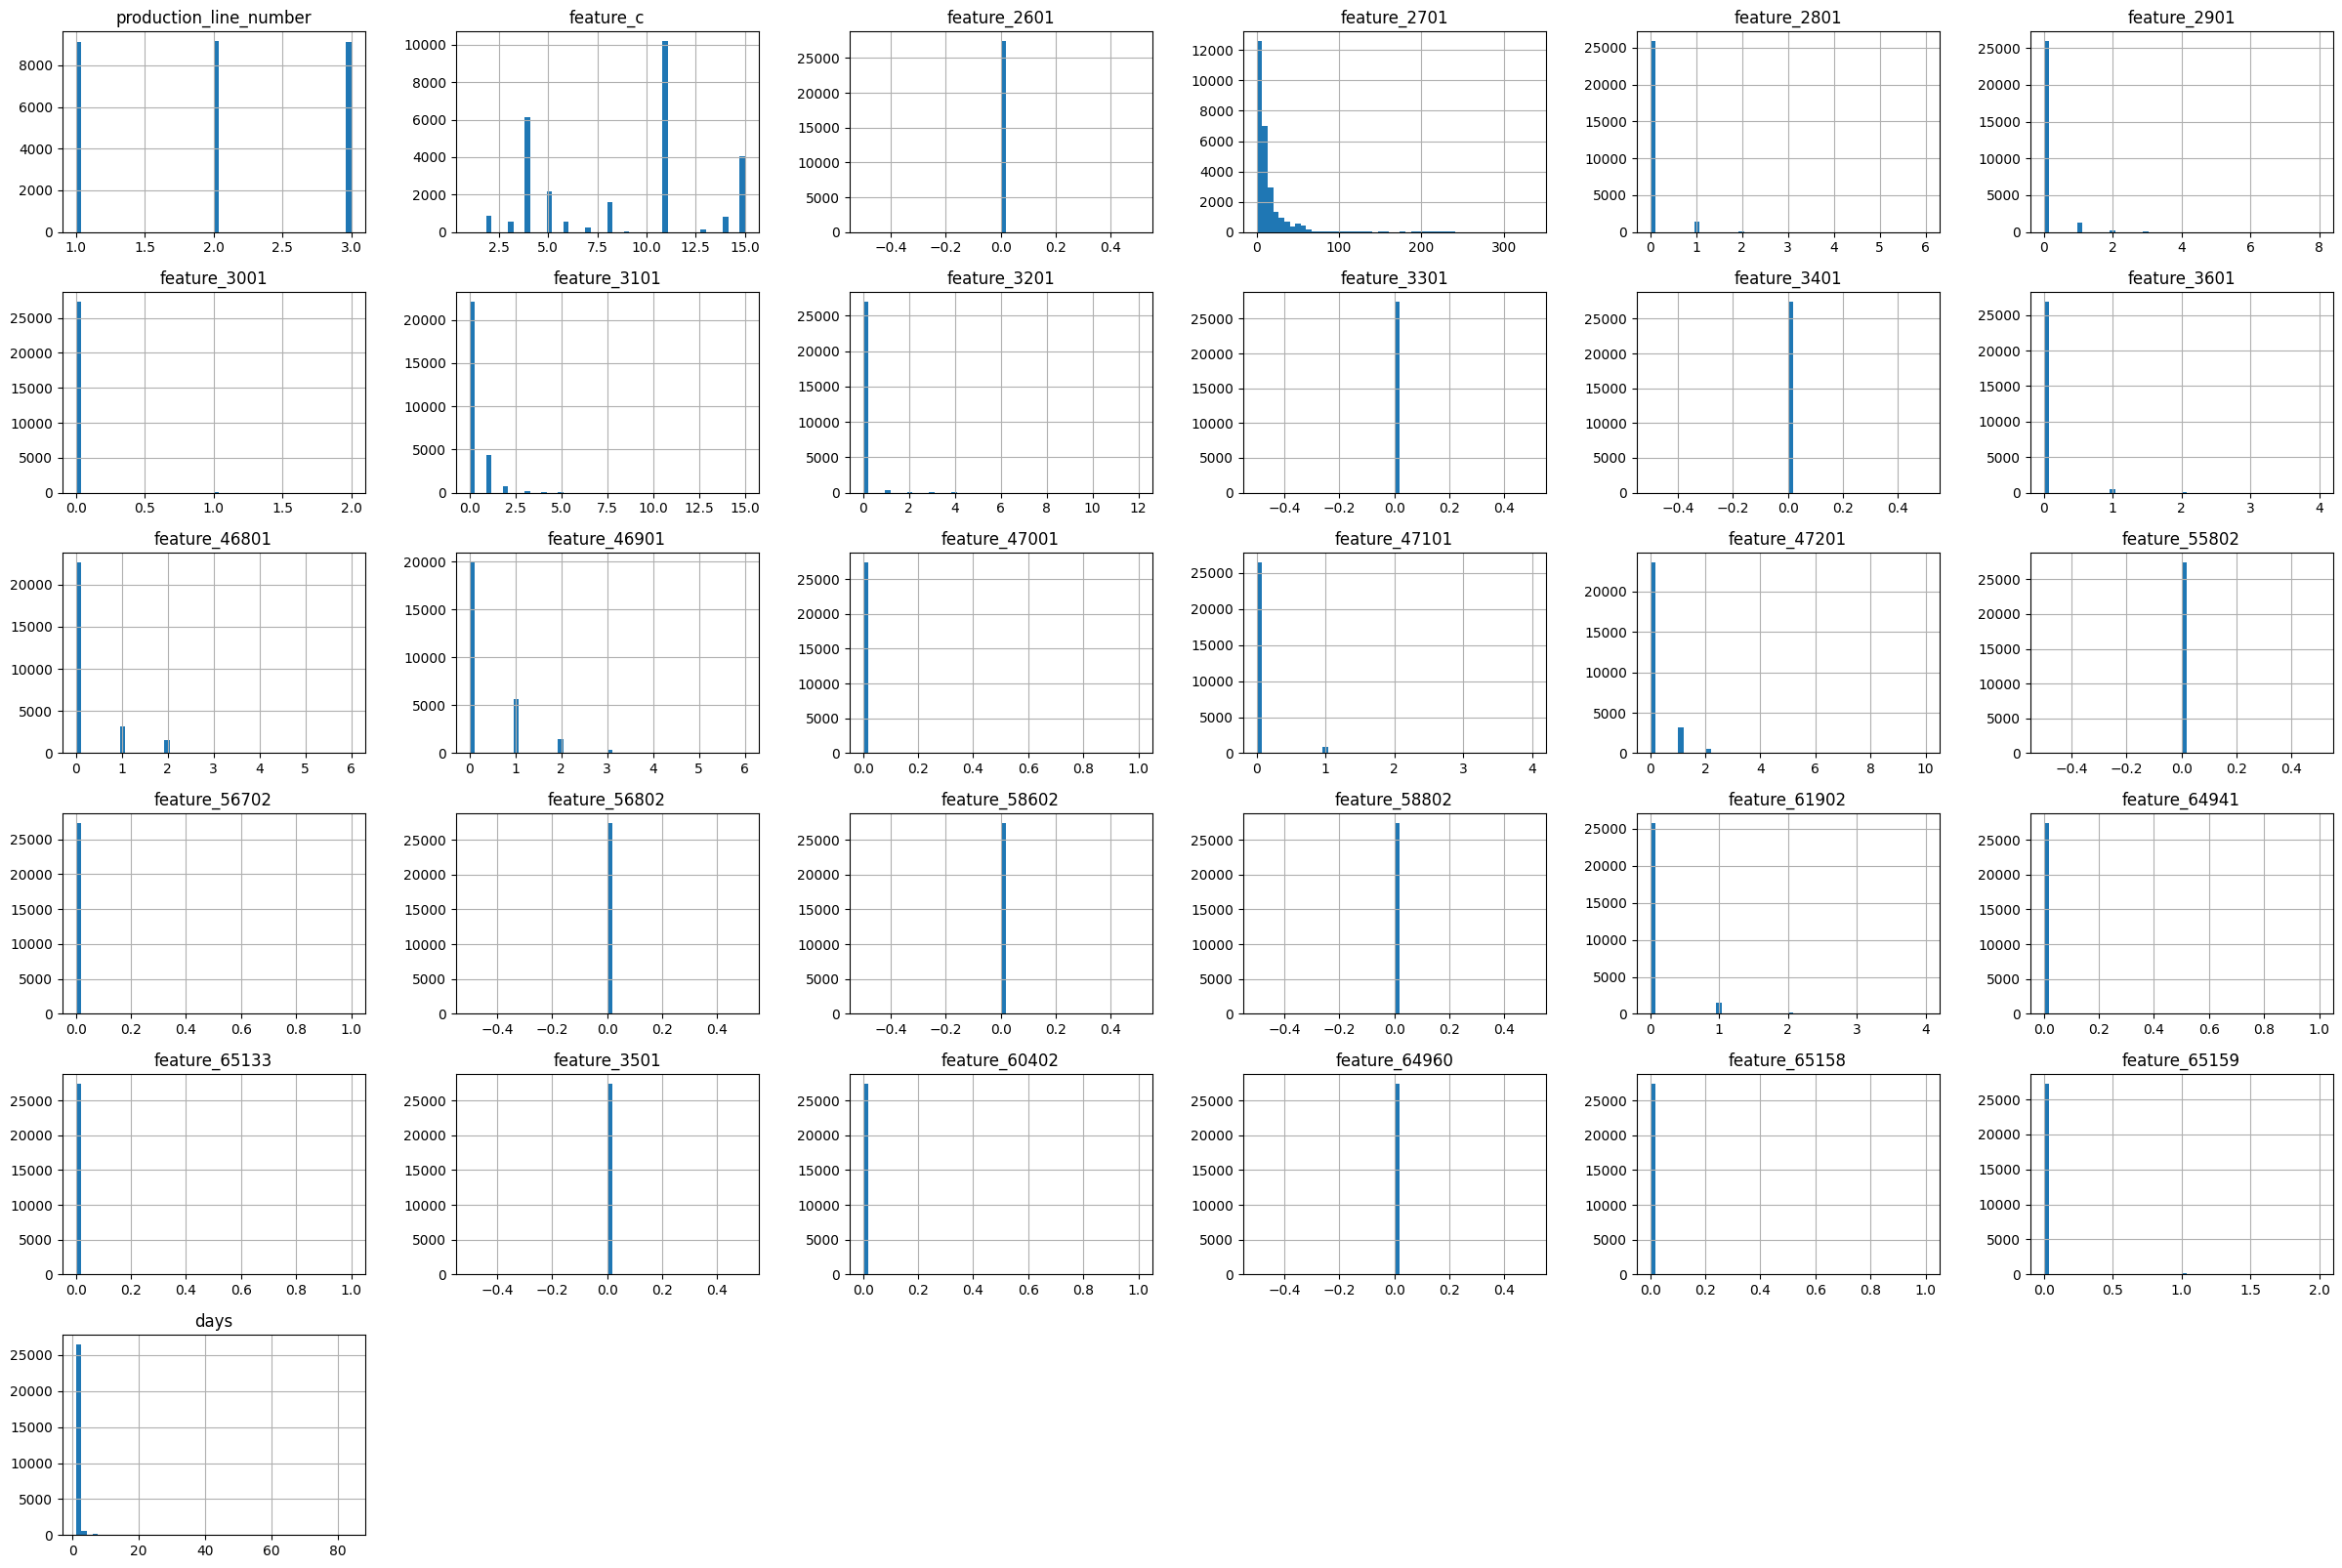

In [139]:
# Distribution in attributes
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(30,20))
plt.show()

### 2. Distplot

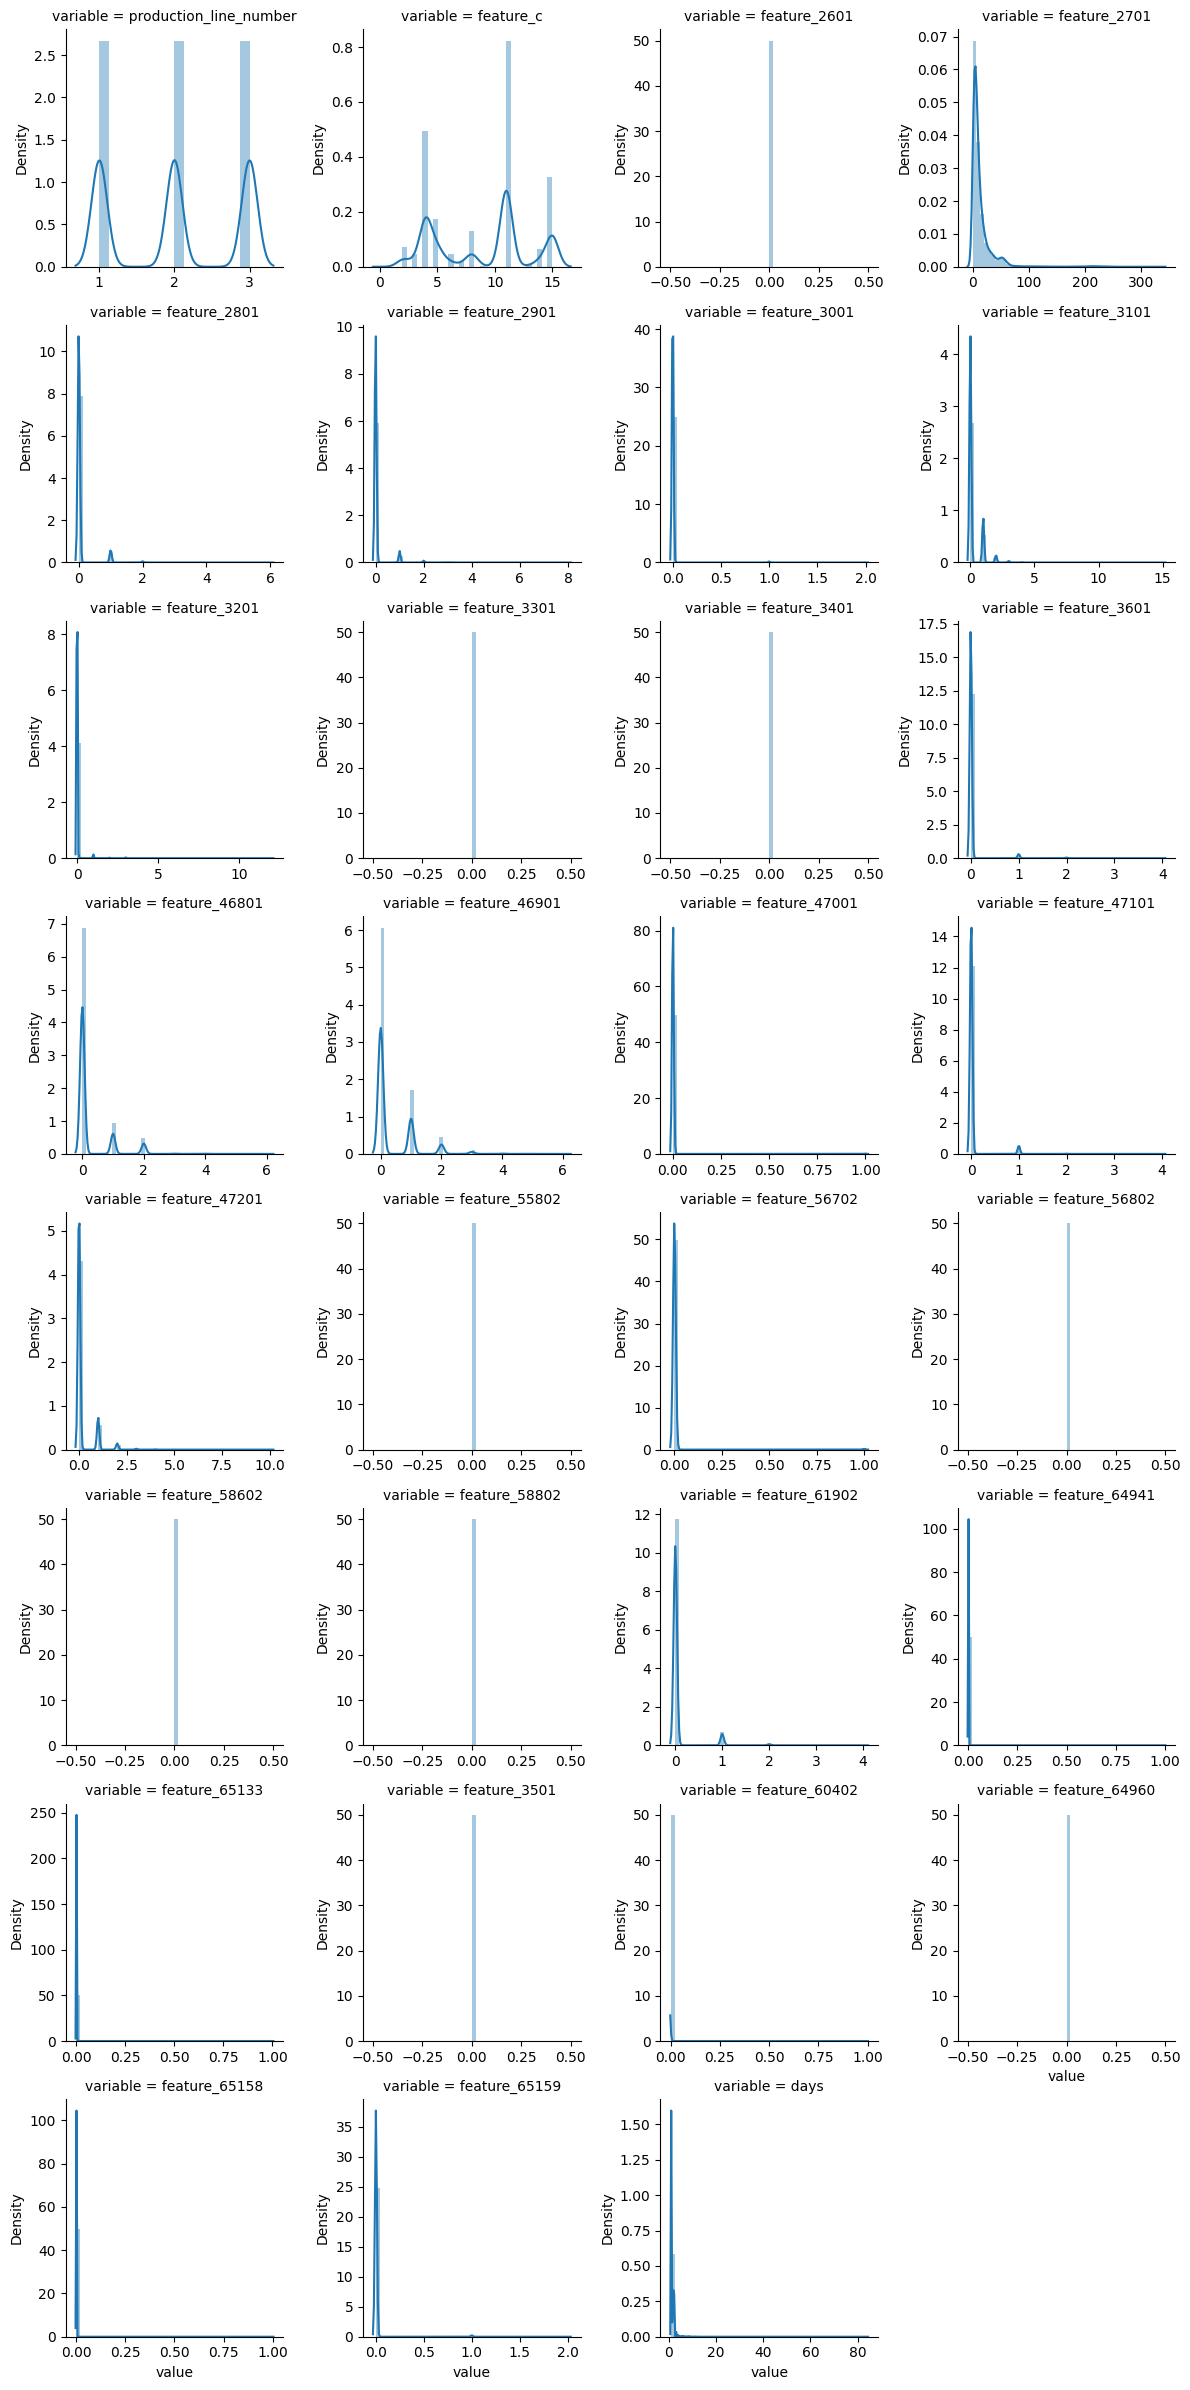

In [140]:
num = [f for f in df.columns if df.dtypes[f] != 'object']
nd = pd.melt(df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

above we draw distrution bar graphs to confirm about statiscts of the data that we got our data have skewness so here also we notice with the above  results that we have following details:<br>
<b>1. 20 columns are positive skewed<br>
2. 9 are normal distrbution <br>
3. 2 are negative skewed<br></b>

#### Let's proceed and check the distribution of the target variable.

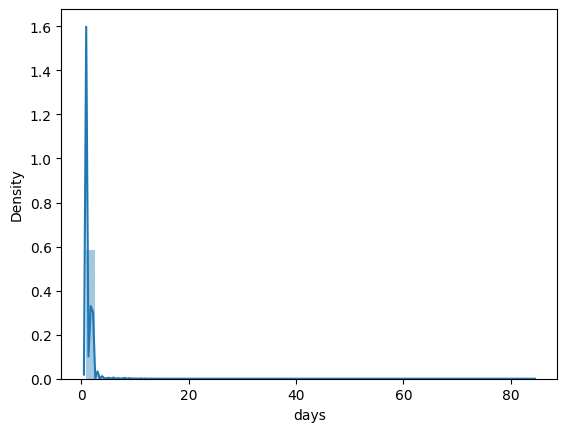

In [141]:
sns.distplot(df['days'])
plt.show()

We see that the target variable days has a positive skewed distribution. In that case we'll need to log transform this variable so that it becomes normally distributed. A normally distributed (or close to normal) target variable helps in better modeling the relationship between target and independent variables. In addition, linear algorithms assume constant variance in the error term. Alternatively, we can also confirm this skewed behavior using the skewness metric.



## 3. Heatmap

<b> Correlation within feature variables </b>

Correlation - A positive correlation is a relationship between two variables in which both variables move in the same direction. Therefore, when one variable increases as the other variable increases, or one variable decreases while the other decreases.

#### Correlation can have a value:

1. 1 is a perfect positive correlation
2. 0 is no correlation (the values don't seem linked at all)
3. -1 is a perfect negative correlation

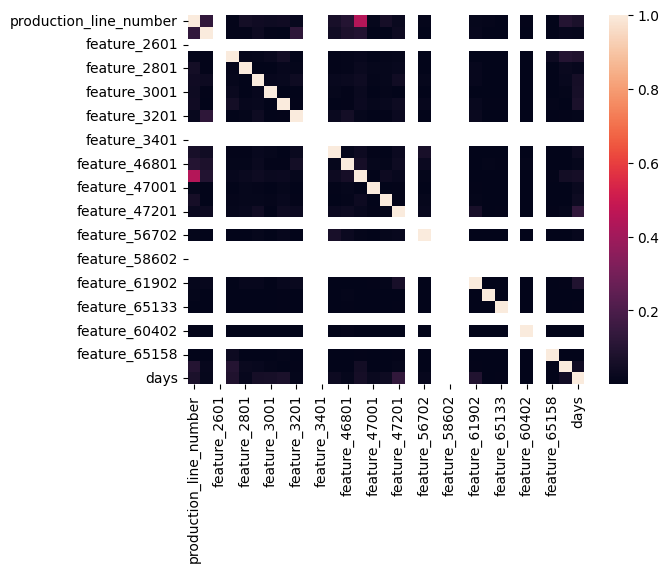

In [142]:
#correlation plot
corr = df.corr().abs()
sns.heatmap(corr)
plt.show()

In [143]:
corr

,production_line_number,feature_c,feature_2601,feature_2701,feature_2801,feature_2901,feature_3001,feature_3101,feature_3201,feature_3301,...,feature_58802,feature_61902,feature_64941,feature_65133,feature_3501,feature_60402,feature_64960,feature_65158,feature_65159,days
production_line_number,1.000000e+00,0.132349,NaN,0.006512,0.051126,0.040605,0.036908,0.042794,0.022375,NaN,...,NaN,0.012789,0.010463,5.393265e-07,NaN,0.007398,NaN,3.813475e-07,0.096814,0.071165
feature_c,1.323494e-01,1.000000,NaN,0.007058,0.004398,0.033879,0.005757,0.001924,0.123456,NaN,...,NaN,0.017751,0.001292,3.288681e-03,NaN,0.001277,NaN,2.839664e-03,0.016800,0.011743
feature_2601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feature_2701,6.511933e-03,0.007058,NaN,1.000000,0.008728,0.013236,0.024037,0.053432,0.000251,NaN,...,NaN,0.002819,0.003200,3.577217e-03,NaN,0.001086,NaN,3.468617e-02,0.096785,0.085172
feature_2801,5.112612e-02,0.004398,NaN,0.008728,1.000000,0.001815,0.000145,0.017338,0.009300,NaN,...,NaN,0.018824,0.001979,2.799382e-03,NaN,0.001400,NaN,1.979390e-03,0.025875,0.017172
feature_2901,4.060493e-02,0.033879,NaN,0.013236,0.001815,1.000000,0.018041,0.023187,0.037674,NaN,...,NaN,0.015795,0.001886,2.666907e-03,NaN,0.001333,NaN,1.885719e-03,0.021012,0.054972
feature_3001,3.690789e-02,0.005757,NaN,0.024037,0.000145,0.018041,1.000000,0.000366,0.002494,NaN,...,NaN,0.001389,0.000542,7.672016e-04,NaN,0.000384,NaN,5.424737e-04,0.008415,0.060313
feature_3101,4.279352e-02,0.001924,NaN,0.053432,0.017338,0.023187,0.000366,1.000000,0.007399,NaN,...,NaN,0.021718,0.004006,5.665201e-03,NaN,0.002576,NaN,1.165509e-02,0.003706,0.072368
feature_3201,2.237493e-02,0.123456,NaN,0.000251,0.009300,0.037674,0.002494,0.007399,1.000000,NaN,...,NaN,0.026315,0.000894,1.263979e-03,NaN,0.000632,NaN,8.937354e-04,0.006491,0.011366
feature_3301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


as we know, it is recommended to avoid having correlated features in your dataset. Indeed, a group of highly correlated features will not bring additional information (or just very few), but will increase the complexity of the algorithm, thus increasing the risk of errors.

In [144]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

In [145]:
to_drop

[]

as we see there is no feature columns with correlation greater than 0.8, so we don't need to remove any feature columns from our dataset

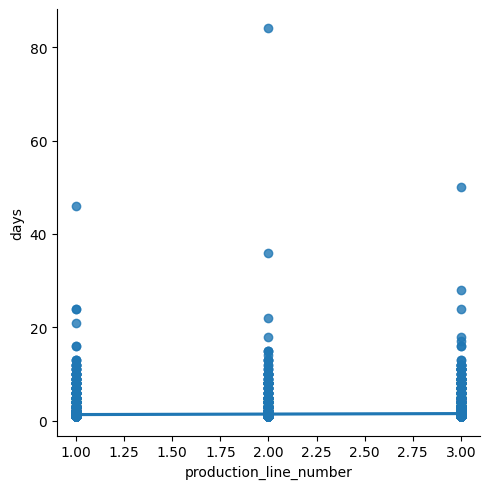

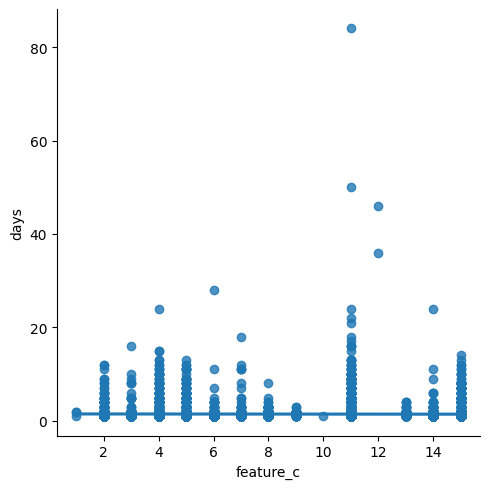

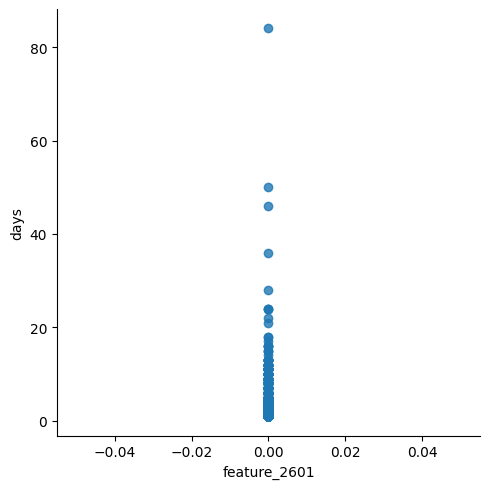

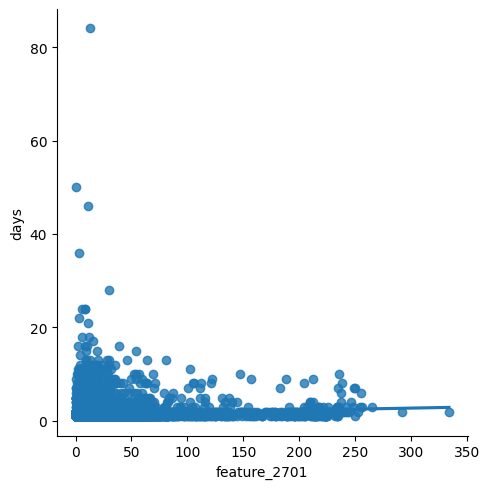

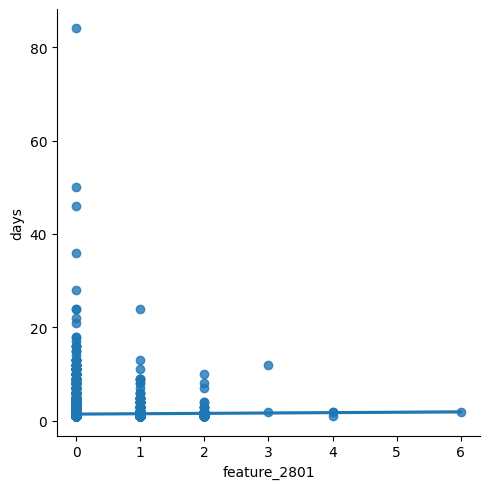

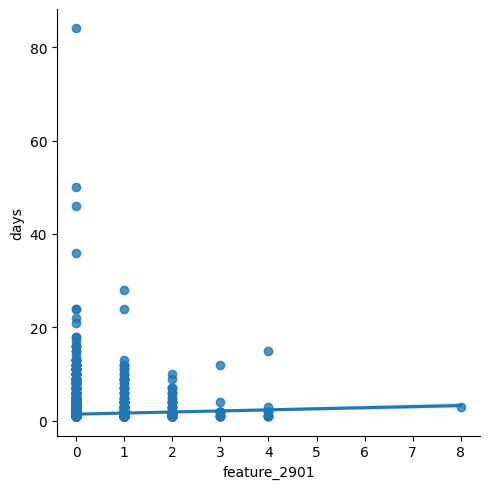

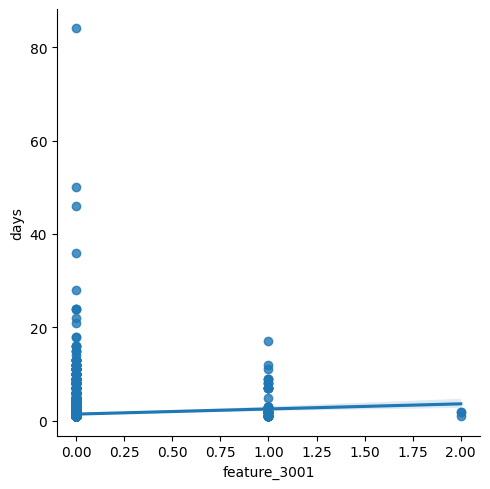

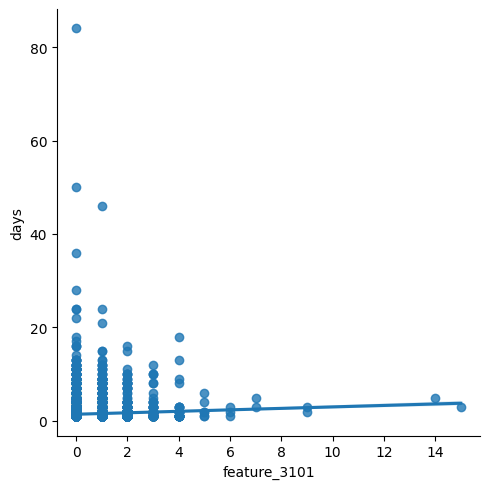

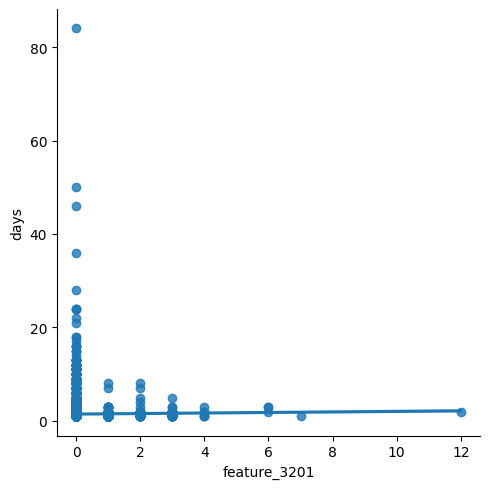

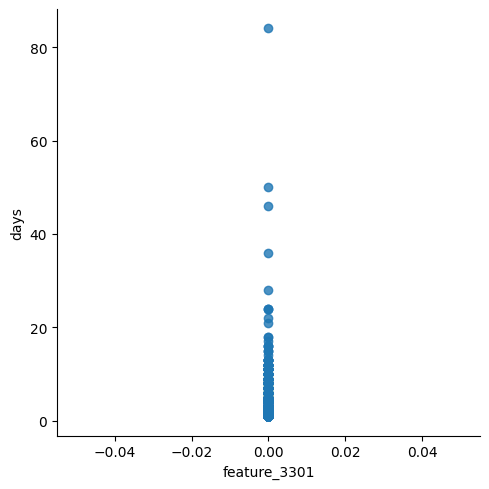

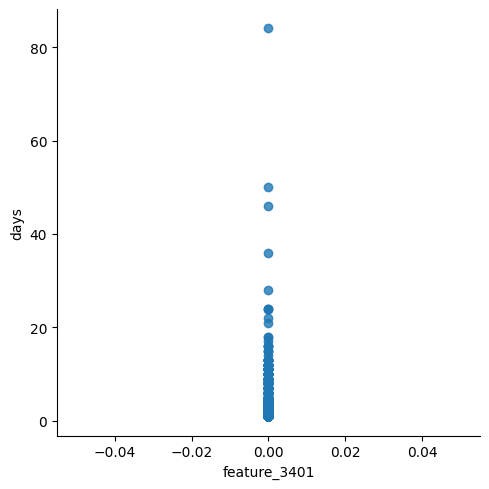

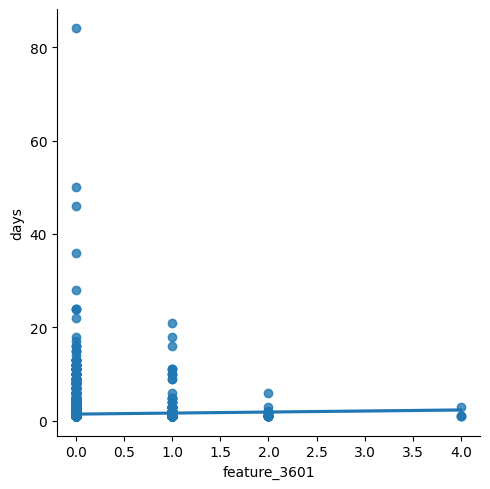

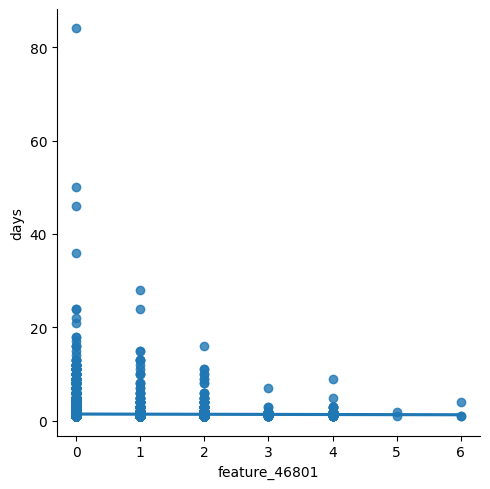

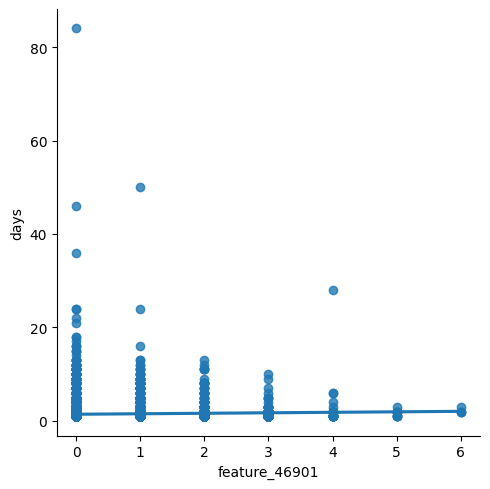

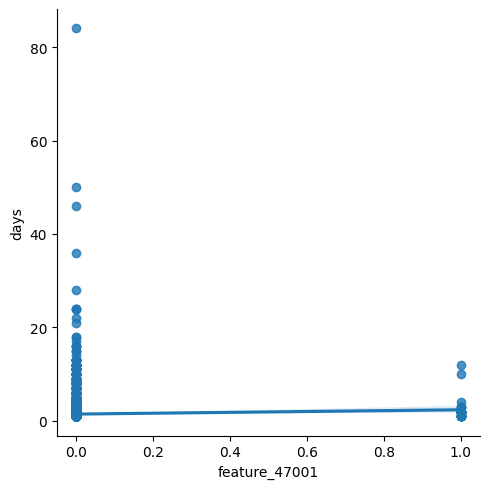

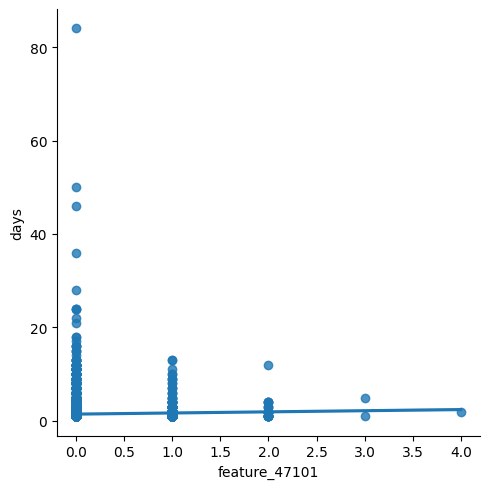

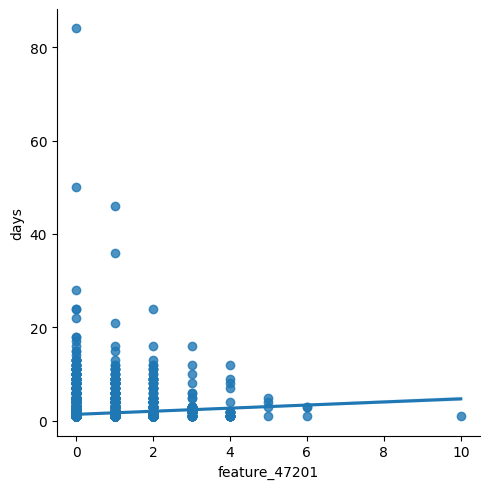

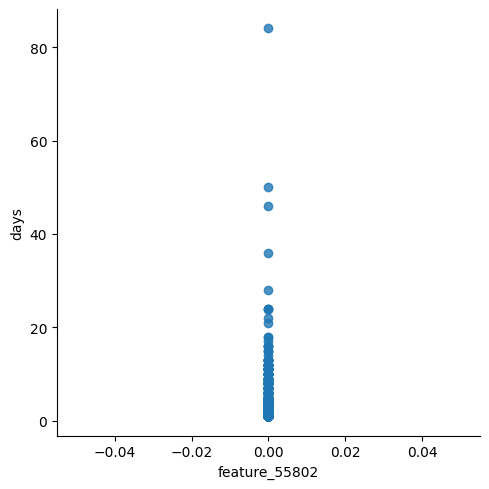

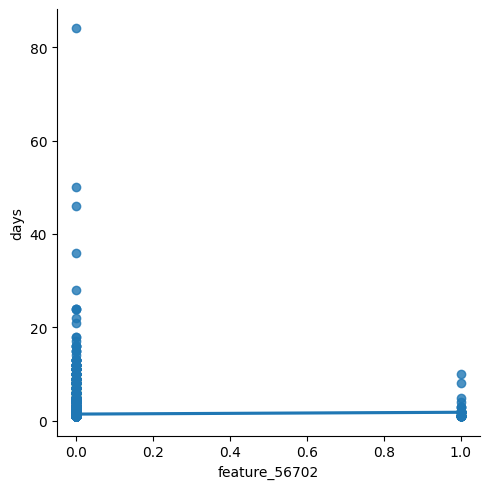

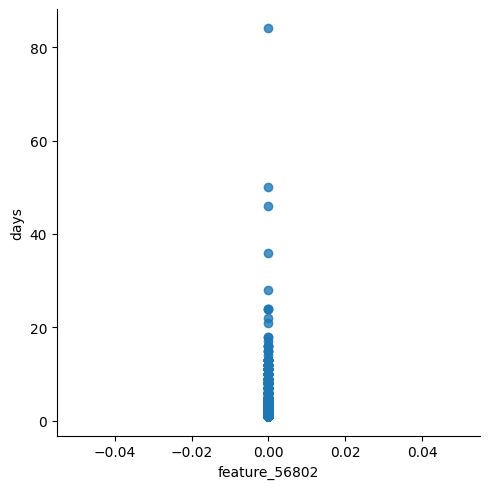

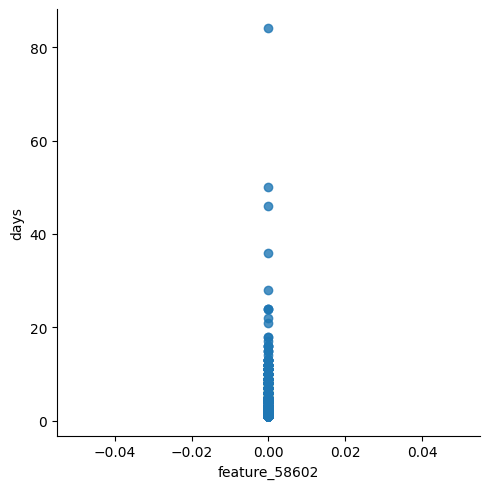

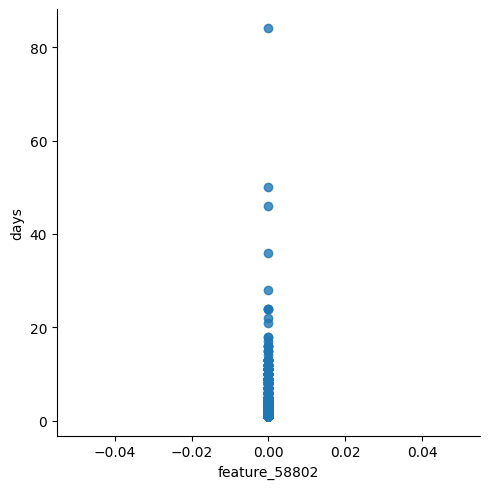

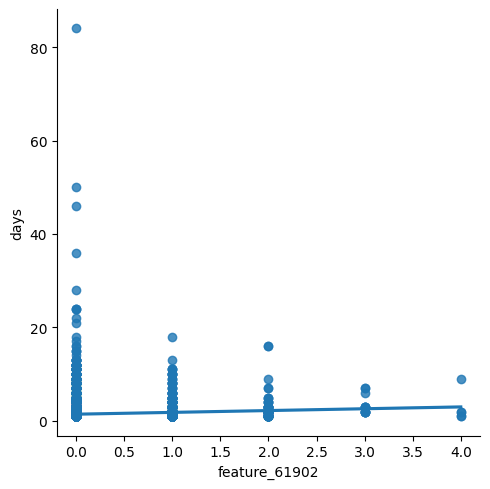

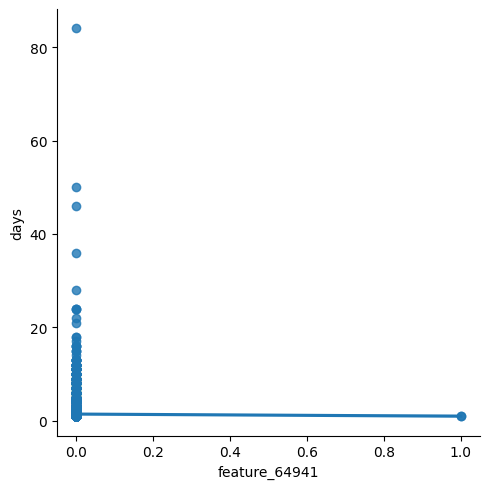

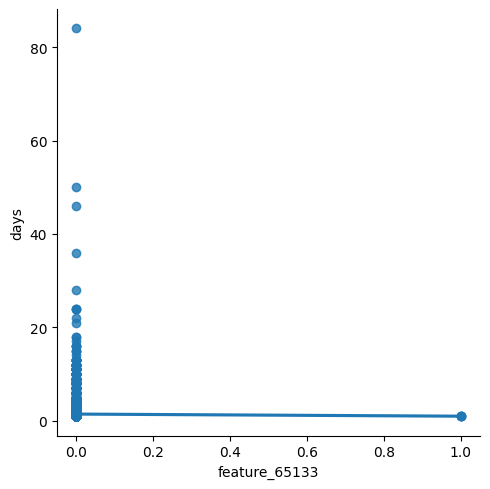

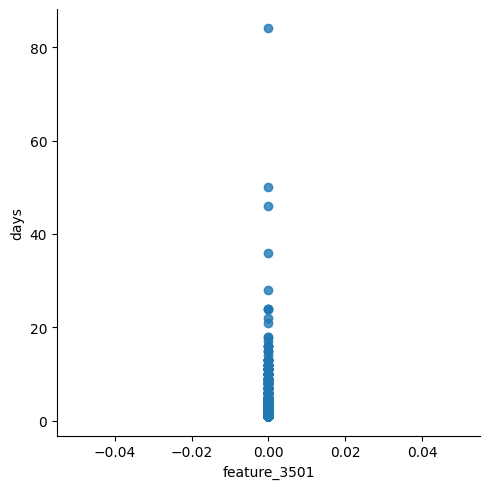

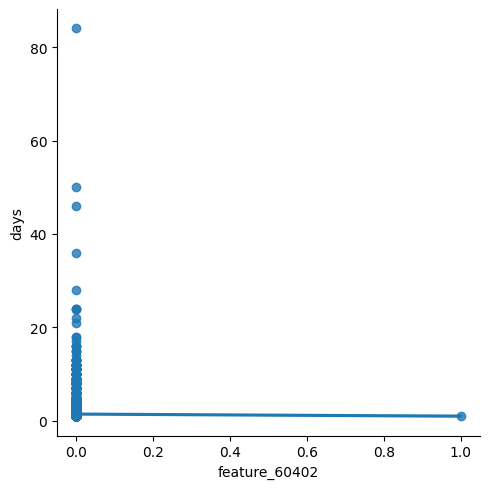

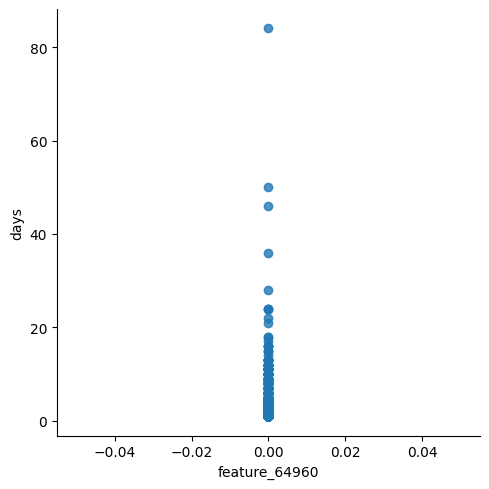

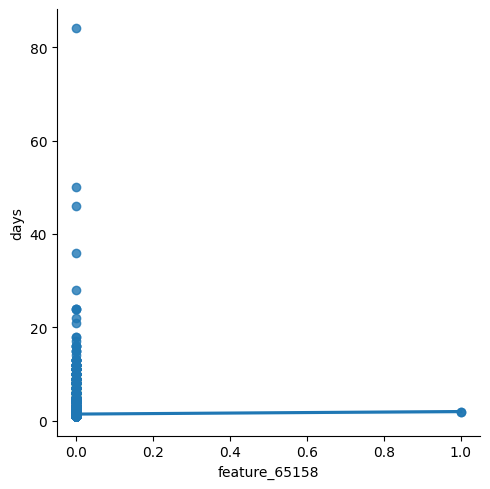

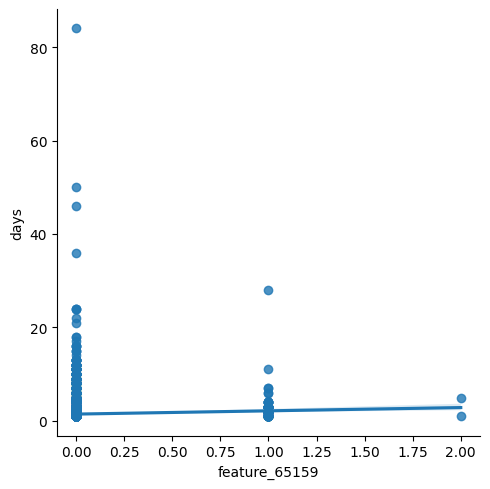

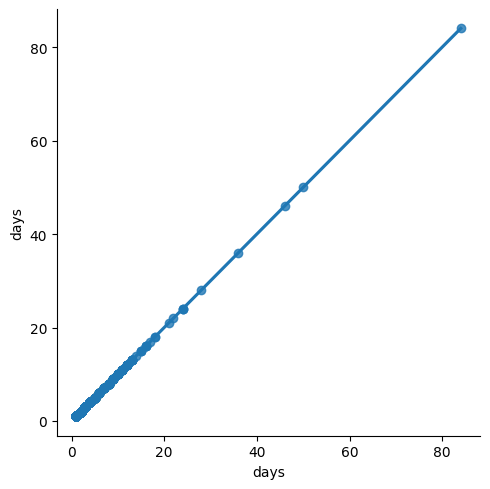

In [146]:
for value in int64_lst_col:
    sns.lmplot(x=value, y="days", data=df);

plt.show()

## 4.Boxplot

<b>Outliers</b>

In statistics, an outlier is a data point that differs significantly from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set.

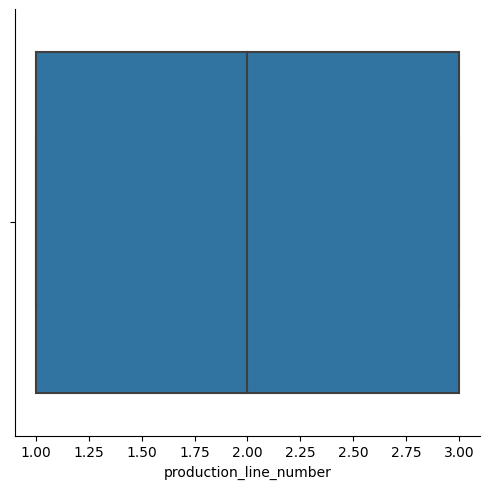

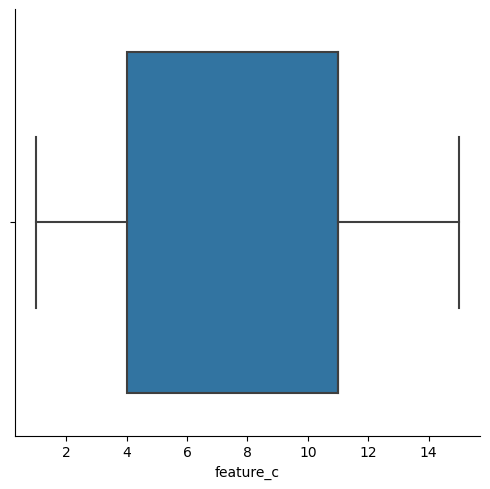

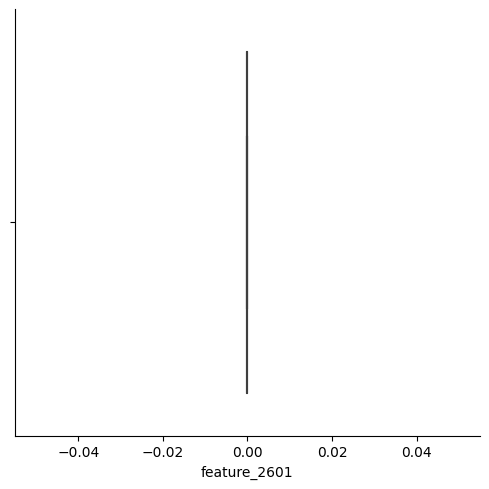

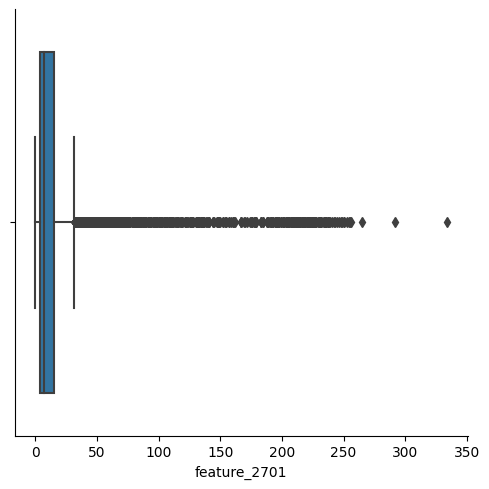

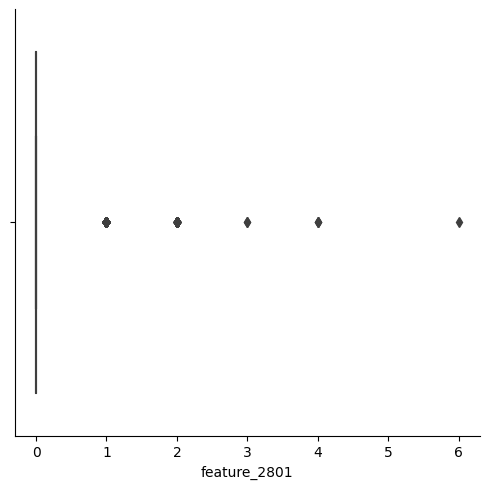

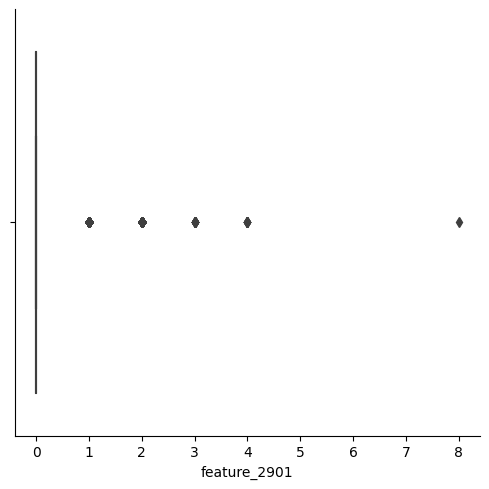

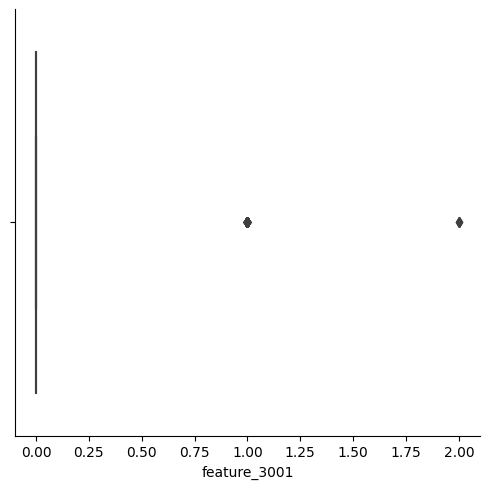

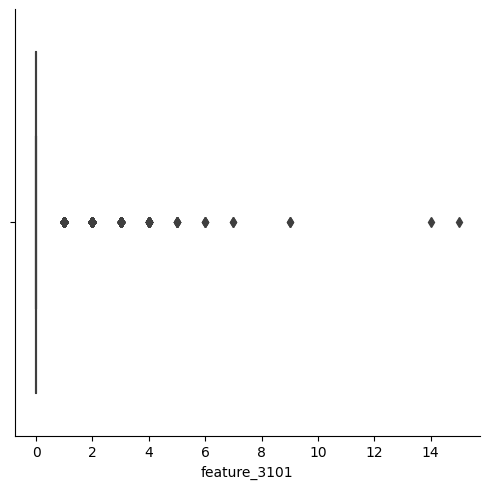

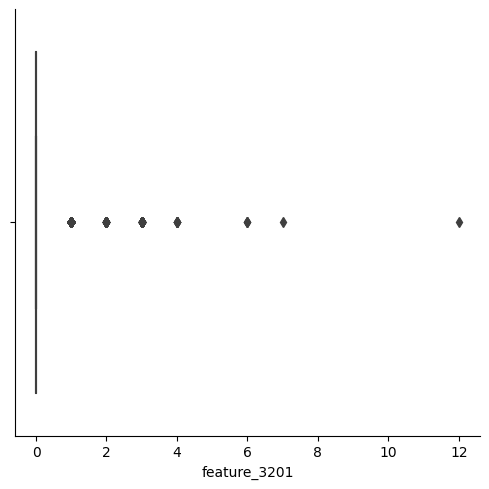

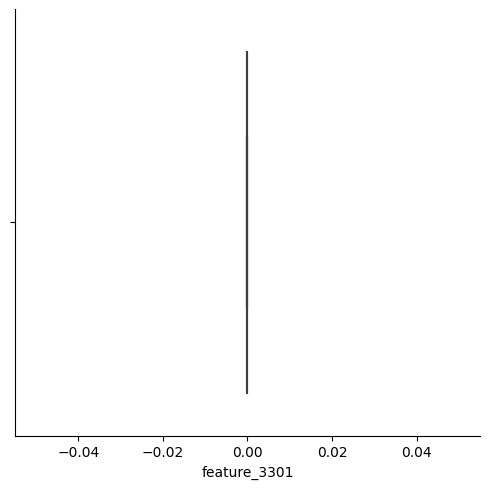

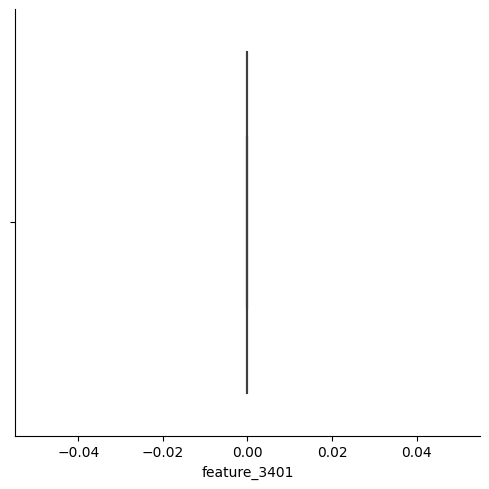

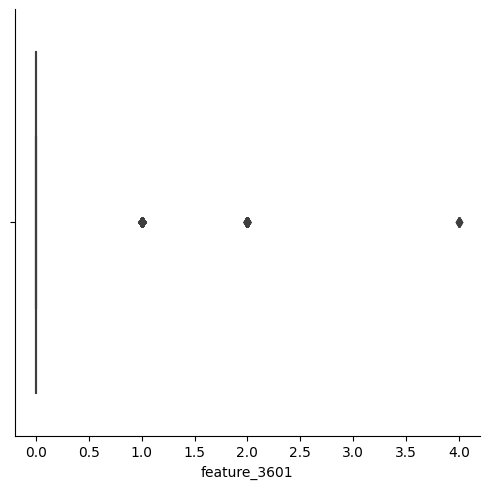

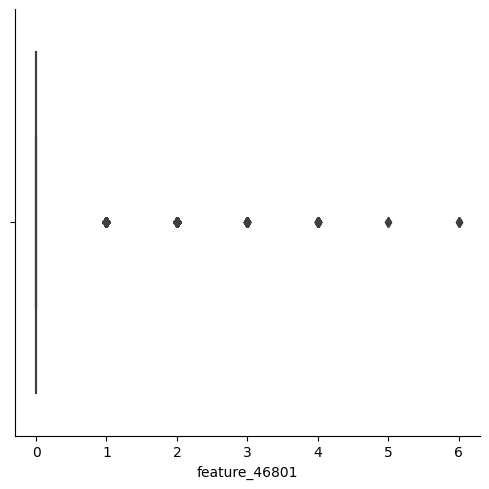

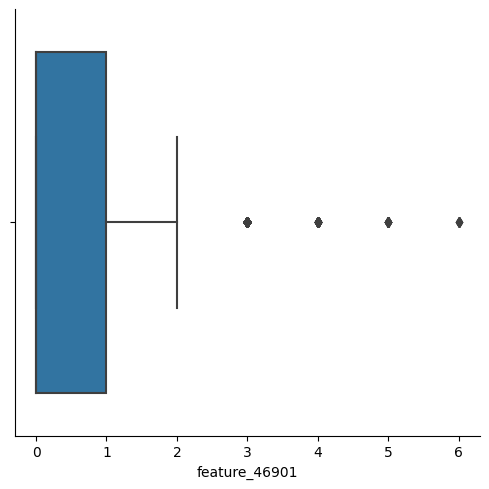

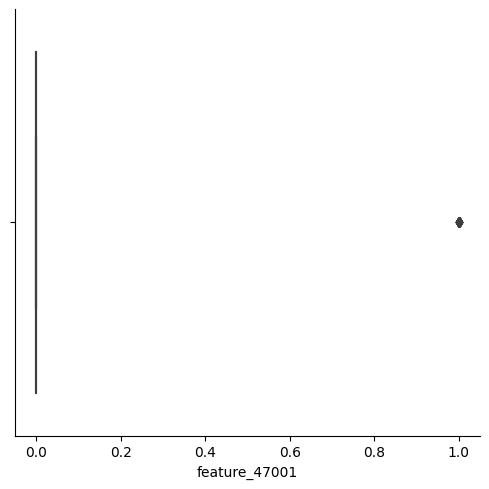

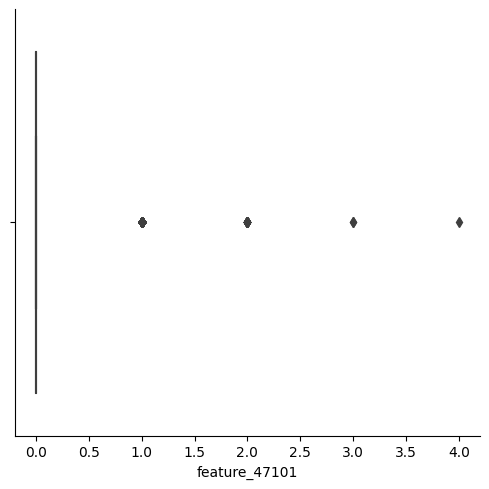

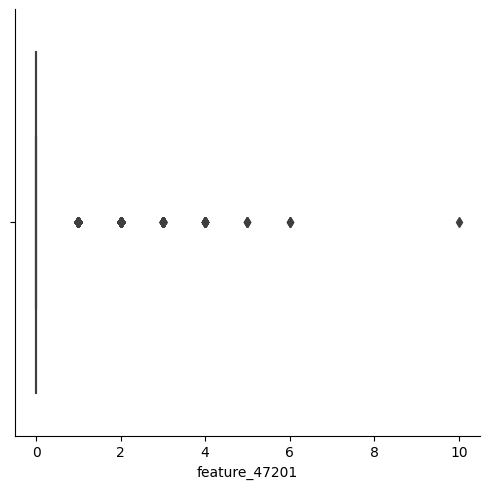

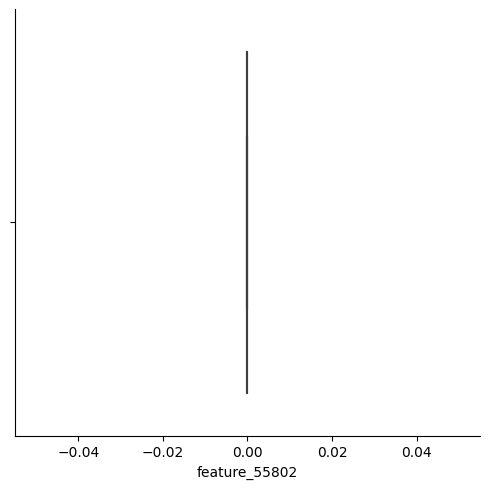

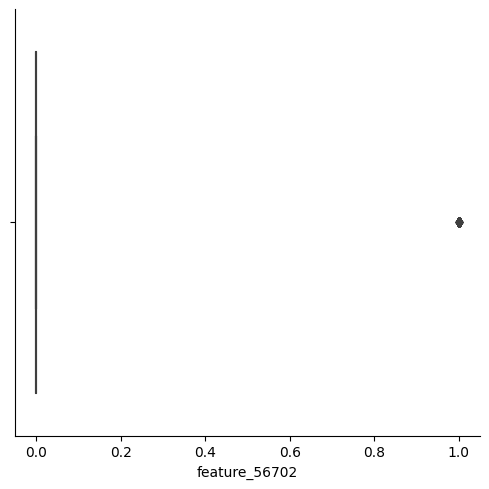

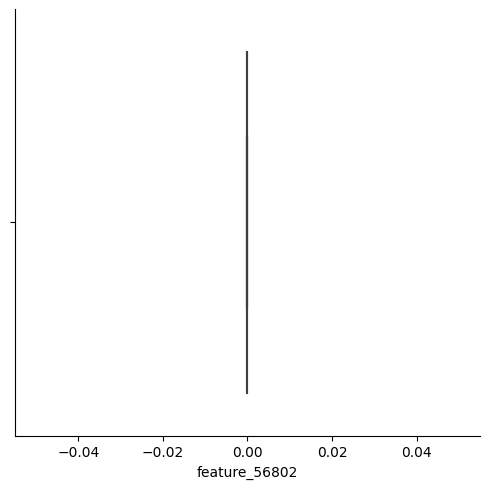

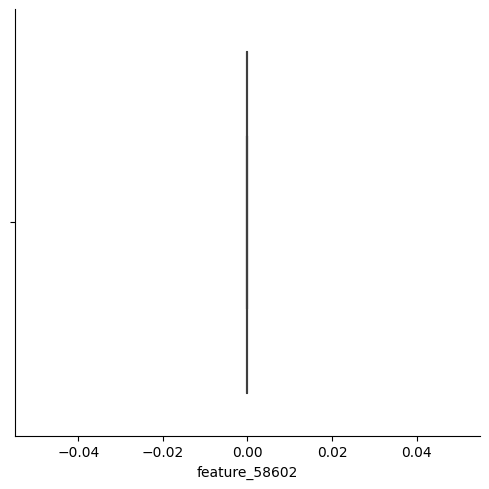

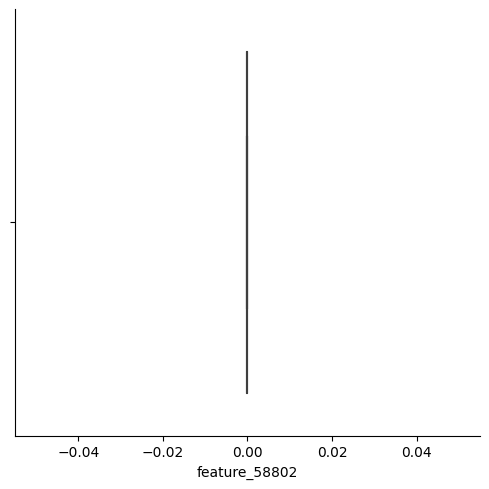

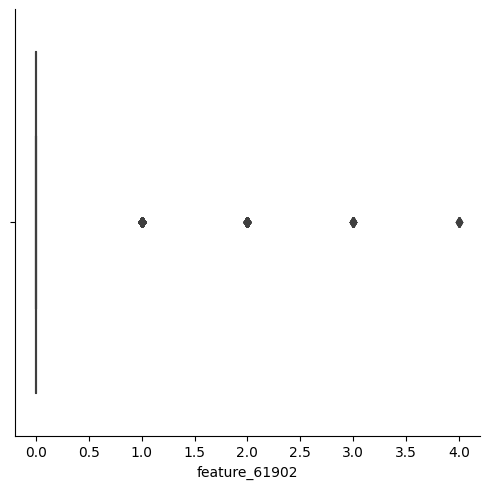

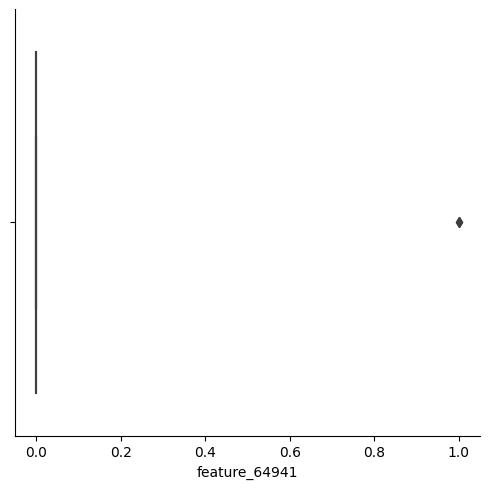

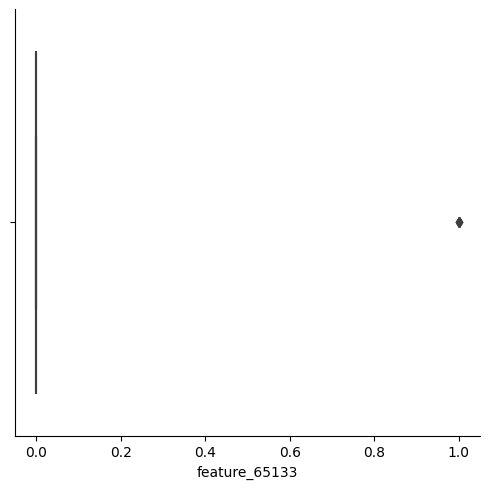

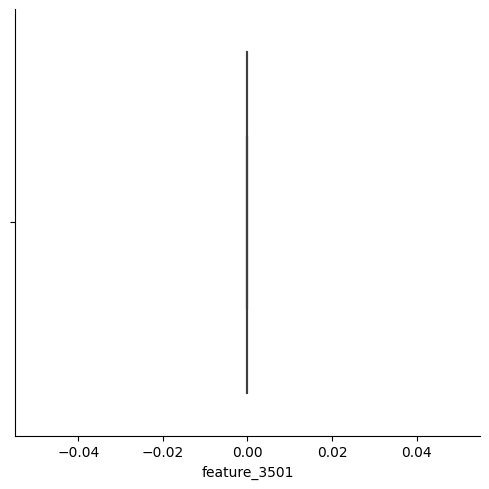

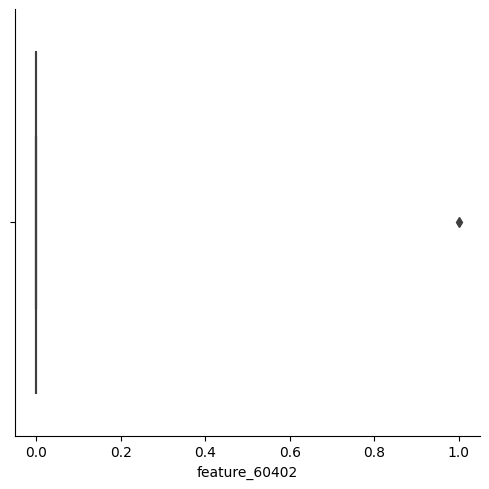

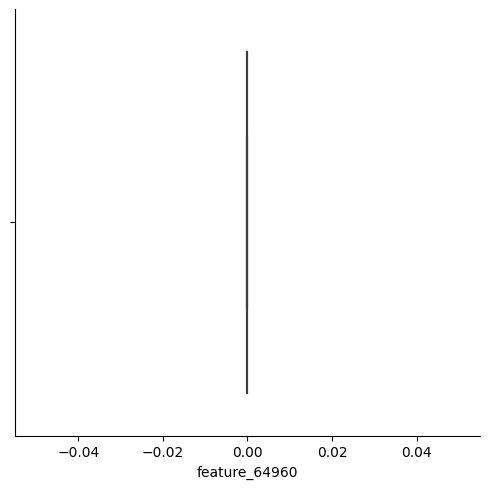

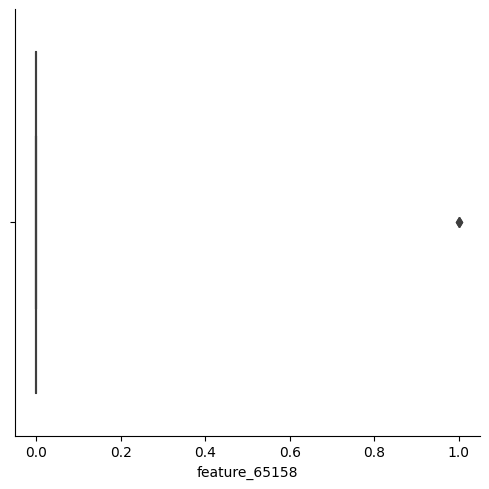

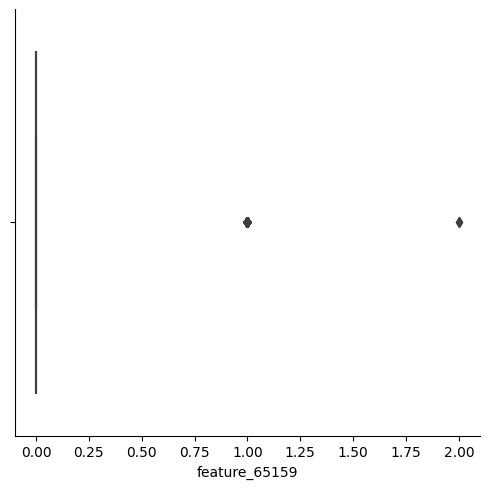

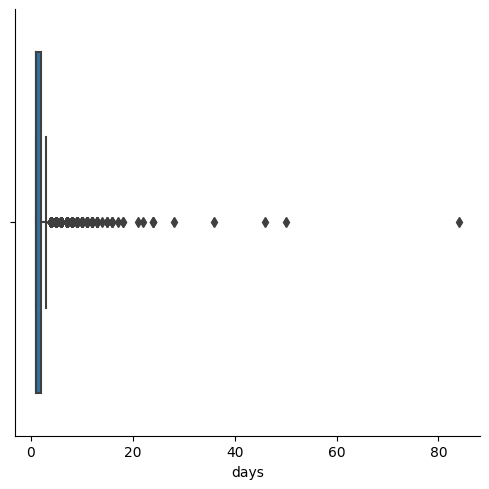

In [147]:
for value in int64_lst_col:
    sns.catplot(data=df, x=value, kind="box")
    
plt.show()

### Step 4 Insights:

In this we confirmed that about skewness of the columns, there are no columns which have more than 0.8 correlation value between them and also found the some columns have outliers.

# Step 5: Data pre-processing


In this stage, we'll deal, encode variables from the dataset.

In [148]:
df = df.drop(list(zero_cols), axis=1)


In [151]:
encoder = OneHotEncoder()
for value in objects_lst:

    transformed = encoder.fit_transform(df[[value]])
    df[encoder.categories_[0]] = transformed.toarray()


In [152]:
objects_lst

['feature_p',
 'feature_b',
 'feature_w',
 'feature_g',
 'feature_f',
 'feature_d',
 'feature_m',
 'feature_l',
 'feature_t',
 'feature_s',
 'feature_t.1']

In [153]:
df = df.drop(objects_lst, axis=1)

In [154]:
# check the encoding categorical Data
df.head()

,production_line_number,feature_c,feature_2701,feature_2801,feature_2901,feature_3001,feature_3101,feature_3201,feature_3601,feature_46801,...,LTPB,LTPW,LTSB,S3PB,S3PW,T3CA,T3HS,T3M3,T3MA,T3MS
0,1,1,3,0,0,0,0,0,0,2,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,1,10,0,1,0,0,0,0,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,1,8,0,0,0,0,0,0,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,2,12,0,2,0,0,0,1,2,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3,2,11,1,2,0,0,0,0,2,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [155]:
# save preprocess dataframe to csv for model training purpose
df.to_csv('df2.csv')